In [84]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [85]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\del15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset

In [86]:
books.shape

(271360, 8)

In [87]:
users.shape

(278858, 3)

In [88]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [89]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [90]:
books = books.iloc[:,:-3]

In [91]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [92]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [93]:
books.yearOfPublication.value_counts()

2002         13903
2001         13715
1999         13414
2000         13373
1998         12116
2003         11610
1997         11494
1996         10687
1995         10259
1994          8857
1993          7920
1992          7390
1991          6926
1990          6394
1989          5825
1988          5545
1987          4761
2004          4629
1986          4258
1999          4017
1985          3912
2000          3859
2002          3724
1998          3650
2001          3644
1984          3631
0             3570
1997          3396
1996          3343
1983          3297
             ...  
1910             1
1900             1
1917             1
1919             1
1806             1
1930             1
1938             1
1897             1
2008             1
1927             1
1914             1
2020             1
2011             1
1924             1
1376             1
1926             1
1944             1
1931             1
2011             1
2021             1
2026             1
2038        

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [94]:
books.loc[books.yearOfPublication == "DK Publishing Inc", :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [95]:
books.loc[books.yearOfPublication == "Gallimard", :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [96]:
books.drop(books[books.yearOfPublication == "Gallimard"].index, inplace=True)

In [97]:
books.drop(books[books.yearOfPublication == "DK Publishing Inc"].index, inplace=True)

In [98]:
books.loc[books.yearOfPublication == "Gallimard", :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [99]:
books.yearOfPublication = books.yearOfPublication.apply(pd.to_numeric)

In [100]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [101]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [102]:
books.drop(books[books.publisher.isnull() == True].index, inplace=True)

In [103]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


## Exploring Users dataset

In [104]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [105]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [106]:
users.loc[(users.Age >90) | (users.Age < 5), 'Age'] = np.nan

### Replace null values in column `Age` with mean

In [107]:
users.Age = users.Age.fillna(users.Age.mean())

In [108]:
users.loc[users.Age == "nan", :]

C:\Users\del15\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,userID,Location,Age


### Change the datatype of `Age` to `int`

In [109]:
users.Age = users.Age.astype(np.int32)

In [110]:
users.Age.dtype

dtype('int32')

## Exploring the Ratings Dataset

### check the shape

In [111]:
ratings.shape

(1149780, 3)

In [112]:
n_users = users.shape[0]
n_books = books.shape[0]

In [113]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

## Inner joins

The most common type of join is called an inner join. An inner join combines two DataFrames based on a join key and returns a new DataFrame that contains only those rows that have matching values in both of the original DataFrames.

Inner joins yield a DataFrame that contains only rows where the value being joins exists in BOTH tables. An example of an inner join, adapted from this page is below:

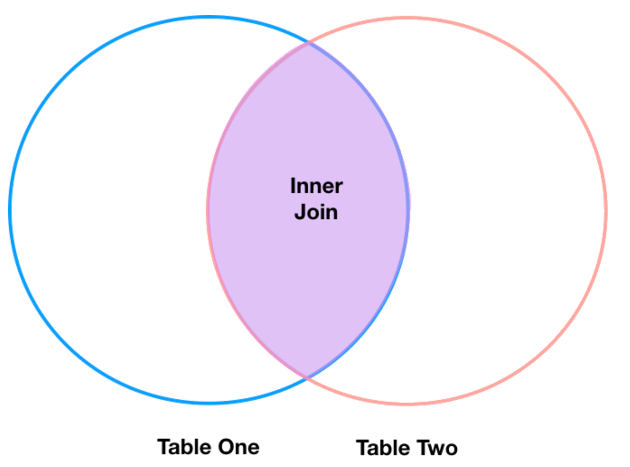

In [114]:
merged_inner = pd.merge(left=ratings,right=books, left_on='ISBN', right_on='ISBN')
# In this case `ISBN` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
print(merged_inner.shape)
merged_inner.head()

(1031130, 7)


,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [115]:
merged_inner = pd.merge(left=merged_inner,right=users, left_on='userID', right_on='userID')
# In this case `ISBN` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
print(merged_inner.shape)
merged_inner.head()

(1031130, 9)


,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",34
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [116]:
merged_inner.bookRating.unique()

array([ 0,  5,  9,  8,  7,  6, 10,  3,  4,  2,  1], dtype=int64)

In [117]:
ratings_1_10 = merged_inner[merged_inner.bookRating > 0]

In [118]:
ratings_1_10.bookRating.unique()

array([ 5,  9,  8,  7,  6, 10,  3,  4,  2,  1], dtype=int64)

In [119]:
ratings_1_10.shape

(383839, 9)

### Find out which rating has been given highest number of times

In [120]:
ratings_1_10.bookRating.value_counts()

8     91804
10    71225
7     66401
9     60776
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

Rating 8 has been given heighest number of time, we can plat a count plot to have graphical representation of the same

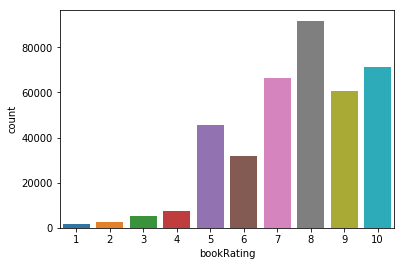

In [121]:
sns.countplot(data=ratings_1_10, x='bookRating')
plt.show()

A countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [122]:
ratings_1_10.groupby('userID')['bookRating'].count().reset_index().sort_values('bookRating', ascending=False)[:10]

,userID,bookRating
2719,11676,6943
24101,98391,5689
46279,189835,1899
37648,153662,1845
5615,23902,1180
57320,235105,1020
18757,76499,1012
41781,171118,962
3902,16795,959
60772,248718,941


In [123]:
min_user_ratings = 100
filter_users = ratings_1_10['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

In [124]:
ratings_1_10_min_100 = ratings_1_10[ratings_1_10['userID'].isin(filter_users)]

In [125]:
print("User Ratings with all number of total ratings:\n",ratings_1_10.shape)
print("User Ratings with only 100+ total ratings:\n",ratings_1_10_min_100.shape)

User Ratings with all number of total ratings:
 (383839, 9)
User Ratings with only 100+ total ratings:
 (102369, 9)


### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [126]:
ratings_matrix = ratings_1_10_min_100.pivot(index='userID', columns='ISBN', values='bookRating')

In [127]:
print(ratings_matrix.shape)
ratings_matrix.head()

(440, 66074)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
ratings_matrix.isnull().sum()

ISBN
0000913154    439
0001046438    439
000104687X    439
0001047213    439
0001047973    439
000104799X    439
0001048082    438
0001053736    439
0001053744    439
0001055607    439
0001056107    438
0001845039    439
0001935968    439
0001944711    439
0001952803    439
0001953877    439
0002000547    439
0002005018    439
0002005050    439
0002005557    439
0002006588    439
0002115328    439
0002116286    439
0002118580    439
0002154900    439
0002158973    439
0002163713    439
0002176181    439
0002176432    439
0002179695    439
             ... 
9997406990    439
999740923X    439
9997409728    439
9997411757    439
9997411870    439
9997412044    439
9997412958    439
9997507002    439
999750805X    439
9997508769    439
9997512952    439
9997519086    439
9997555635    439
9998914140    439
B00001U0CP    439
B00005TZWI    439
B00006CRTE    439
B00006I4OX    439
B00007FYKW    439
B00008RWPV    439
B000092Q0A    439
B00009EF82    439
B00009NDAN    438
B0000DYXID    439
B0000

In [129]:
ratings_matrix.fillna(0, inplace=True)

In [130]:
ratings_matrix.isnull().sum()

ISBN
0000913154    0
0001046438    0
000104687X    0
0001047213    0
0001047973    0
000104799X    0
0001048082    0
0001053736    0
0001053744    0
0001055607    0
0001056107    0
0001845039    0
0001935968    0
0001944711    0
0001952803    0
0001953877    0
0002000547    0
0002005018    0
0002005050    0
0002005557    0
0002006588    0
0002115328    0
0002116286    0
0002118580    0
0002154900    0
0002158973    0
0002163713    0
0002176181    0
0002176432    0
0002179695    0
             ..
9997406990    0
999740923X    0
9997409728    0
9997411757    0
9997411870    0
9997412044    0
9997412958    0
9997507002    0
999750805X    0
9997508769    0
9997512952    0
9997519086    0
9997555635    0
9998914140    0
B00001U0CP    0
B00005TZWI    0
B00006CRTE    0
B00006I4OX    0
B00007FYKW    0
B00008RWPV    0
B000092Q0A    0
B00009EF82    0
B00009NDAN    0
B0000DYXID    0
B0000T6KHI    0
B0000VZEJQ    0
B0000X8HIE    0
B00013AX9E    0
B0001I1KOG    0
B000234N3A    0
Length: 66074, dtyp

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [131]:
from scipy.sparse.linalg import svds

In [132]:
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [133]:
sigma

array([147.86505334, 149.3252639 , 150.04583148, 152.18779748,
       152.85092339, 154.59835563, 154.79234893, 155.89656853,
       158.0387241 , 159.20452803, 159.79868146, 162.01559917,
       162.66913244, 163.3027848 , 166.02017651, 166.80982507,
       168.03377923, 170.76490745, 171.0090041 , 173.2664674 ,
       174.55625832, 176.63532917, 178.61625736, 180.29249907,
       182.22447299, 184.10415849, 187.59494573, 189.74901812,
       190.94518579, 195.13457875, 199.79880776, 201.70062063,
       202.18428336, 203.46475662, 207.23913363, 209.91536471,
       213.20180251, 216.84285916, 224.26669747, 231.63466808,
       235.66562174, 249.9299874 , 252.00477066, 261.17800888,
       267.92933045, 281.00386615, 293.69040211, 379.57255682,
       634.71795583, 680.3033617 ])

In [134]:
sigma = np.diag(sigma)

In [135]:
sigma

array([[147.86505334,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.3252639 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.04583148, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.57255682,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.71795583,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.3033617 ]])

In [136]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [137]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = ratings_matrix.columns)

In [138]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025435,-0.002179,-0.001453,-0.002179,-0.002179,0.002992,-0.003815,0.007085,0.007085,0.012476,...,0.000208,0.000274,0.042120,-0.016812,-0.079440,0.004883,0.028040,0.000138,-0.001522,0.067883
1,-0.009927,-0.003617,-0.002411,-0.003617,-0.003617,0.001039,0.001498,-0.003512,-0.003512,0.001624,...,-0.000360,0.000395,0.007998,0.001164,-0.028259,0.001008,0.002274,-0.000240,0.000026,-0.012930
2,-0.014924,-0.015591,-0.010394,-0.015591,-0.015591,0.007366,-0.014016,0.011928,0.011928,0.012008,...,-0.000433,0.001967,0.048691,0.005677,0.118079,0.006984,0.003151,-0.000288,0.009096,-0.058054
3,-0.021020,0.035453,0.023636,0.035453,0.035453,0.030357,0.024524,-0.001135,-0.001135,0.067559,...,0.003022,0.009995,0.088258,-0.008757,0.015976,0.028634,0.000253,0.002015,0.031009,-0.047275
4,0.002035,-0.008156,-0.005438,-0.008156,-0.008156,0.003119,0.002917,0.000222,0.000222,0.006312,...,0.002145,0.001677,-0.011525,0.009334,0.673907,0.002657,-0.008190,0.001430,0.005080,0.047187


In [139]:
# Adding back userID as it will require to perform below steps
preds_df['userID'] = ratings_matrix.index
preds_df.set_index('userID', inplace=True)

In [140]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.025435,-0.002179,-0.001453,-0.002179,-0.002179,0.002992,-0.003815,0.007085,0.007085,0.012476,...,0.000208,0.000274,0.042120,-0.016812,-0.079440,0.004883,0.028040,0.000138,-0.001522,0.067883
2110,-0.009927,-0.003617,-0.002411,-0.003617,-0.003617,0.001039,0.001498,-0.003512,-0.003512,0.001624,...,-0.000360,0.000395,0.007998,0.001164,-0.028259,0.001008,0.002274,-0.000240,0.000026,-0.012930
2276,-0.014924,-0.015591,-0.010394,-0.015591,-0.015591,0.007366,-0.014016,0.011928,0.011928,0.012008,...,-0.000433,0.001967,0.048691,0.005677,0.118079,0.006984,0.003151,-0.000288,0.009096,-0.058054
4017,-0.021020,0.035453,0.023636,0.035453,0.035453,0.030357,0.024524,-0.001135,-0.001135,0.067559,...,0.003022,0.009995,0.088258,-0.008757,0.015976,0.028634,0.000253,0.002015,0.031009,-0.047275
4385,0.002035,-0.008156,-0.005438,-0.008156,-0.008156,0.003119,0.002917,0.000222,0.000222,0.006312,...,0.002145,0.001677,-0.011525,0.009334,0.673907,0.002657,-0.008190,0.001430,0.005080,0.047187


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [141]:
userID = 2110

In [142]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

def recommend_books(predictions_df, userID, books_df, original_ratings_df, num_recommendations = False):
    user_row_number = userID - 1  #UserID starts at zero not 1
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending = False)
    
    user_data = original_ratings_df[original_ratings_df.userID == (userID)]
    user_full = (user_data.merge(books_df, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False)
                )
    print('User {0} has already rated {1} books.'.format(userID, user_full.dropna().shape[0]))
    print('Recommending the highest {0} predicted ratings books not already rated.'.format(num_recommendations))
    
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, users, user_full

In [143]:
#From the predictions locate the userID and then sort it in descending to get the users predictions
sorted_user_predictions = preds_df.loc[userID].sort_values(ascending = False)
sorted_user_predictions = pd.DataFrame(sorted_user_predictions)
sorted_user_predictions

,2110
ISBN,
059035342X,0.666278
0345370775,0.356946
0345384911,0.332482
044021145X,0.328190
043935806X,0.305998
0451151259,0.302311
0439139597,0.284296
0439064872,0.278464
0380759497,0.278080


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_books(preds_df, userID, books, ratings, 10)

In [144]:
#1st get the ratings done by user 
user_rating_info = ratings_1_10_min_100[ratings_1_10_min_100['userID']==userID]
user_data = (user_rating_info.merge(users, how = 'left', left_on = 'userID', right_on = 'userID').sort_values(['bookRating'], ascending = False))

In [145]:
user_data

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location_x,Age_x,Location_y,Age_y
0,2110,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
23,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
26,2110,0345283554,10,Han Solo at Stars' End,Daley,1979,Not Avail,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
27,2110,0345283929,10,Empire Strikes Back Wars,Donald F Glut,1980,Ballantine Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
28,2110,034528710X,10,Han Solo and the Lost Legacy,Brian Daley,1980,Del Rey Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
60,2110,0486270718,10,The Invisible Man (Dover Thrift Editions),H. G. Wells,1992,Dover Publications,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
30,2110,0345362276,10,Wizard at Large (Rookies Series),Terry Brooks,1989,Del Rey Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
31,2110,0345375580,10,The Elf Queen of Shannara (Heritage of Shannar...,Terry Brooks,1993,Del Rey Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
83,2110,0679811761,10,The Secret of Terror Castle (Three Investigato...,Robert Arthur,1991,Random House Children's Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34
82,2110,0679805265,10,Long Shot (Three Investigators Crimebusters (P...,Megan Stine,1993,Random House Children's Books,"charlotte, north carolina, usa",34,"charlotte, north carolina, usa",34


### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [146]:
user_full_info = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').sort_values(['bookRating'], ascending = False))

### Get top 10 recommendations for above given userID from the books not already rated by that user

In [149]:
to_drop = [x for x in user_full_info if x.endswith('_y')]
user_full_info.drop(to_drop, axis=1, inplace=True)

In [151]:
for col in user_full_info:
        if col.endswith('_x'):
            user_full_info.rename(columns={col:col.rstrip('_x')}, inplace=True)

In [152]:
user_full_info.head(10)

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
0,2110,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,"charlotte, north carolina, usa",34
19,2110,0439222303,10,"Poof! Rabbits Everywhere! (Abracadabra!, 1)",Peter Lerangis,2002,Little Apple,"charlotte, north carolina, usa",34
21,2110,0345260627,10,Splinter of the Mind's Eye,Alan Dean Foster,1978,Ballantine Books,"charlotte, north carolina, usa",34
22,2110,0345317580,10,Magic Kingdom for Sale - Sold! (Magic Kingdom ...,Terry Brooks,1990,Del Rey Books,"charlotte, north carolina, usa",34
23,2110,0743486625,10,Damnation Alley,Roger Zelazny,2004,I Books,"charlotte, north carolina, usa",34
24,2110,097089726x,10,Jasper,Michelle Groce,2003,Novello Festival Press,"charlotte, north carolina, usa",34
25,2110,0590629786,10,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic,"charlotte, north carolina, usa",34
26,2110,0590629794,10,"The Encounter (Animorphs , No 3)",K. A. Applegate,1996,Scholastic,"charlotte, north carolina, usa",34
27,2110,0590629808,10,"The Message (Animorphs , No 4)",K. A. Applegate,1996,Scholastic,"charlotte, north carolina, usa",34
28,2110,0345307674,10,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books,"charlotte, north carolina, usa",34


## Thank you!